In [1]:
#https://www.kaggle.com/code/kerneler/starter-nba-data-5c9b3741-f/data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Dell/Desktop/UPSKILL DIGITAL/nba.csv")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [85]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Data set has 4 Categorical and 5 Numeric variables

Categorical variables:
- Name, Team, Position, College

Numeric variables:
- Number, Age, Height, Weight, Salary


In [6]:
print(data.shape)

(458, 9)


There are 458 rows and 9 columns in the dataset

In [7]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


Name, Team, Position, Height and College are objects whereas Number, Age, Weight and Salary are float.

In [88]:
#Checking for outliers for Age, Weight and Salary using Summary statistics
#Summary statistics for Age
data['Age'].describe()

count    457.000000
mean      26.938731
std        4.404016
min       19.000000
25%       24.000000
50%       26.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64

In [ ]:
There are no identified outliers within the age bracket in this dataset

In [60]:
data['Weight'].describe()

count    457.000000
mean     221.522976
std       26.368343
min      161.000000
25%      200.000000
50%      220.000000
75%      240.000000
max      307.000000
Name: Weight, dtype: float64

There are no identided outliers within the weight category in this dataset 

In [89]:
data['Salary'].describe()

count    4.460000e+02
mean     4.842684e+06
std      5.229238e+06
min      3.088800e+04
25%      1.044792e+06
50%      2.839073e+06
75%      6.500000e+06
max      2.500000e+07
Name: Salary, dtype: float64

In [ ]:
There are no identified outliers within the salaries in this dataset

In [22]:
#Describing numeric attributes of the dataset
data.describe(include=[np.number])

,Age,Weight,Salary
count,457.000000,457.000000,4.460000e+02
mean,26.938731,221.522976,4.842684e+06
std,4.404016,26.368343,5.229238e+06
min,19.000000,161.000000,3.088800e+04
25%,24.000000,200.000000,1.044792e+06
50%,26.000000,220.000000,2.839073e+06
75%,30.000000,240.000000,6.500000e+06
max,40.000000,307.000000,2.500000e+07


In [90]:
#Describing string attributes of the dataset
data.describe(include = ['O'])

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Avery Bradley,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


There are 457 names of players in this dataset and they are all unique. This shows that there are no duplicates.

In [91]:
#Checking for unique values (another method)
data.nunique()

Name        457
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       87
College     118
Salary      309
dtype: int64

In [92]:
duplicatedNames = data[data[['Name']].duplicated()]
print(duplicatedNames)

Empty DataFrame
Columns: [Name, Team, Number, Position, Age, Height, Weight, College, Salary]
Index: []


There are no duplicated names in this dataset as already evidenced in .describe()

In [93]:
#Checking for Null values in the dataset
data.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [8]:
#Checking for Null values in the dataset
data.isnull().any()

Name        True
Team        True
Number      True
Position    True
Age         True
Height      True
Weight      True
College     True
Salary      True
dtype: bool

In [ ]:
There are blank records in all the fields of this dataset as indicated by the return of "True". 

In [9]:
#Checking for count of missing values
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Name, Team, Number, Position, Age, Height and Weight each have one blank record. College has 85 blank records while Salary has 12 blank records. 

# DATA CLEANING

In [12]:
#Dropping unrequired column "Number" from the dataset
data.drop(['Number'], axis = 1, inplace = True)
data

,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,C,26.0,7-0,231.0,Kansas,947276.0


In [ ]:
Column 'Number' has now been dropped from the dataset

In [11]:
#Dropping null values in the dataset
data = data.dropna()

In [12]:
#Checking to see if null values were dropped
data.isnull().any()

Name        False
Team        False
Position    False
Age         False
Height      False
Weight      False
College     False
Salary      False
dtype: bool

In [13]:
data.isnull().sum()

Name        0
Team        0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

Null values have been dropped as all columns now return "False" and count of 0

In [14]:
#Checking data shape after dropping null values 
data.shape

(364, 8)

There are now 364 rows and 8 columns after dropping blank records and Number field in the dataset.

# DATA MANIPULATION

In [100]:
#I noticed that the Position column used abbreviations and I will like to indicate the full names for easier readibilty. To do
#this, I first checked for unique names in the column.
data.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [74]:
#Changing the abbreviations in the Position column to their full names
data['Position'] = data['Position'].replace({'PG': "Point Guard",'SF':"Small Forward", "SG": "Shooting Guard", 
                                             "PF": "Power Forward", "C": "Center"})
data

C:\Users\Dell\AppData\Local\Temp\ipykernel_15020\2063103512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'] = data['Position'].replace({'PG': "Point Guard",'SF':"Small Forward", "SG": "Shooting Guard",


,Name,Team,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,Point Guard,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,Small Forward,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,Shooting Guard,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,Power Forward,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,Center,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,Shooting Guard,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,Small Forward,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,Power Forward,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,Point Guard,26.0,6-3,203.0,Butler,2433333.0


The dataset shows 364 rows and 8 columns evidencing dropped records. Also the 'Number' column was dropped. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      364 non-null    object 
 1   Team      364 non-null    object 
 2   Position  364 non-null    object 
 3   Age       364 non-null    float64
 4   Height    364 non-null    object 
 5   Weight    364 non-null    float64
 6   College   364 non-null    object 
 7   Salary    364 non-null    int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 24.2+ KB


In [15]:
#Coverting Salary field from float to integer
data["Salary"] = data["Salary"].astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16516\3618998448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Salary"] = data["Salary"].astype(int)


In [17]:
#Checking to see if Salary field has been changed to integer
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      364 non-null    object 
 1   Team      364 non-null    object 
 2   Position  364 non-null    object 
 3   Age       364 non-null    float64
 4   Height    364 non-null    object 
 5   Weight    364 non-null    float64
 6   College   364 non-null    object 
 7   Salary    364 non-null    int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 24.2+ KB


Salary character type now integer indicated by 'int32'

## CHARTS

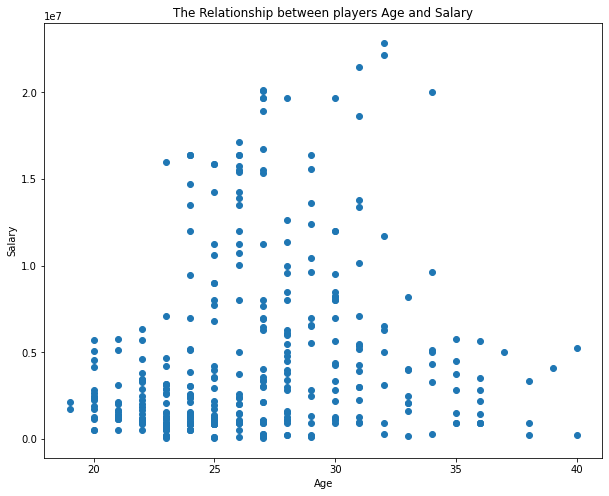

In [20]:
#Scatter plot to determine the relationship between players Age and Salary
plt.figure(figsize = (10,8))
plt.scatter(data['Age'],data['Salary'], label = "Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("The Relationship between players Age and Salary")
plt.show()

Players in the 31 - 35 age bracket earn the highest salaries.

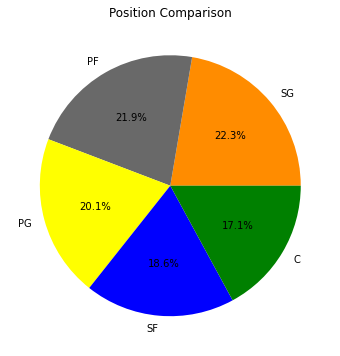

In [27]:
value = data['Position'].value_counts()
my_colors = ['darkorange', 'dimgrey', 'yellow', 'blue', 'green']
my_explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(value.values,labels=value.index,autopct='%1.1f%%', colors=my_colors)
plt.title('Position Comparison')
plt.show()

The Pie chart shows that majority of the players are Shooting Guards at 23.9%

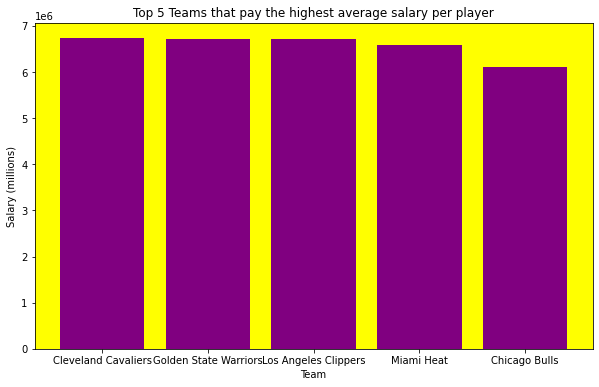

In [123]:
#Top 5 Teams that pay the highest avaerage salary per player
datax=data8.groupby('Team')['Salary'].agg(['mean']).sort_values(by=('mean'),ascending=False).reset_index().head(5)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_facecolor('yellow')
ax1.bar(datax['Team'],datax['mean'],color='purple')
plt.title('Top 5 Teams that pay the highest average salary per player')
plt.xlabel("Team")
plt.ylabel("Salary (millions)")
plt.show()

Cleveland Cavaliers pay the highest average salary per player

In [3]:
data.groupby('Team')['Weight'].mean()

Team
Atlanta Hawks             221.266667
Boston Celtics            219.466667
Brooklyn Nets             215.600000
Charlotte Hornets         220.400000
Chicago Bulls             218.933333
Cleveland Cavaliers       227.866667
Dallas Mavericks          227.000000
Denver Nuggets            217.533333
Detroit Pistons           222.200000
Golden State Warriors     224.600000
Houston Rockets           220.333333
Indiana Pacers            222.266667
Los Angeles Clippers      219.733333
Los Angeles Lakers        227.066667
Memphis Grizzlies         218.000000
Miami Heat                218.400000
Milwaukee Bucks           224.062500
Minnesota Timberwolves    228.642857
New Orleans Pelicans      221.000000
New York Knicks           223.625000
Oklahoma City Thunder     229.400000
Orlando Magic             213.357143
Philadelphia 76ers        222.133333
Phoenix Suns              218.600000
Portland Trail Blazers    218.600000
Sacramento Kings          221.333333
San Antonio Spurs         223.933

In [9]:
data.groupby('Age')['Salary'].sum()

Age
19.0      3860880.0
20.0     51790026.0
21.0     39280213.0
22.0     61307050.0
23.0     79355103.0
24.0    170338514.0
25.0    172958166.0
26.0    247196385.0
27.0    267069647.0
28.0    153305658.0
29.0    168052779.0
30.0    211855757.0
31.0    187250724.0
32.0    100320456.0
33.0     55030346.0
34.0     76060300.0
35.0     27693918.0
36.0     22381196.0
37.0     38333334.0
38.0      7360164.0
39.0      5035745.0
40.0     14000750.0
Name: Salary, dtype: float64

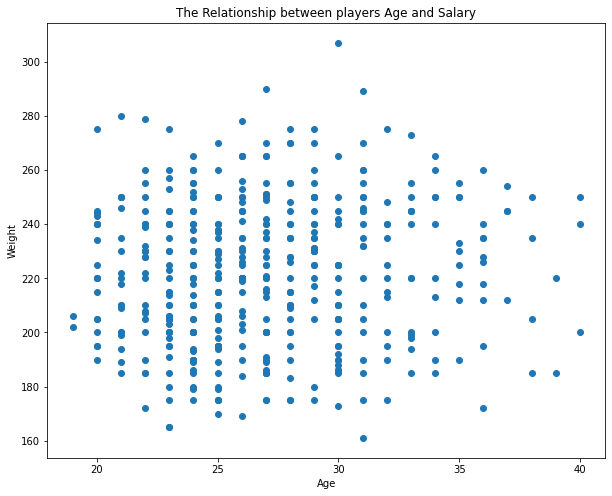

In [10]:
#Scatter plot to determine the relationship between players Age and Salary
plt.figure(figsize = (10,8))
plt.scatter(data['Age'],data['Weight'], label = "Age")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("The Relationship between players Age and Salary")
plt.show()

In [2]:
import numpy as np
a = np.array([7,8,6])
print(a)

[7 8 6]


In [11]:
b = np.array([7,8,9], ndmin = 1)
print (b)

[7 8 9]


In [12]:
arr = np.array([10,13,15])
arr = arr + 5
print (arr[2])

20


In [13]:
arre = np.array([10,13,15])
arre = arre - 5
print (arre[2])

10


In [7]:
from datetime import datetime
today()+10

NameError: name 'today' is not defined

In [14]:
all([1>2,2<4])

False

In [17]:
any([1>2,2<4])

True

In [5]:
import numpy as np
import pandas as pd
Arr = pd.Series(np.random.randn(7))
print (Arr.size)

7
